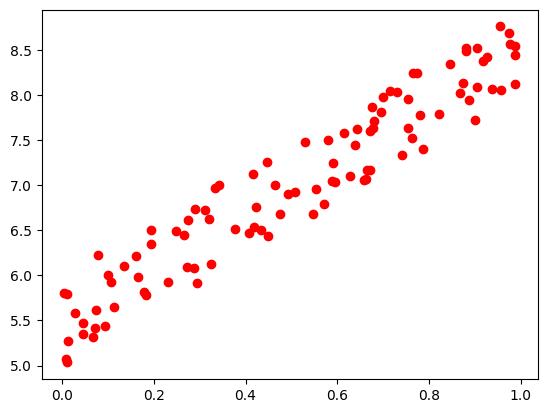

In [23]:
# Generate random linear regression data
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate random data
def generate_data():
    x = np.random.rand(100, 1)
    y = 5 + 3 * x + np.random.rand(100, 1)
    return x, y

# Plot the data
def plot_data(x, y):
    plt.plot(x, y, 'ro')
    plt.show()
    
# Generate data
x, y = generate_data()

# Plot data
plot_data(x, y)


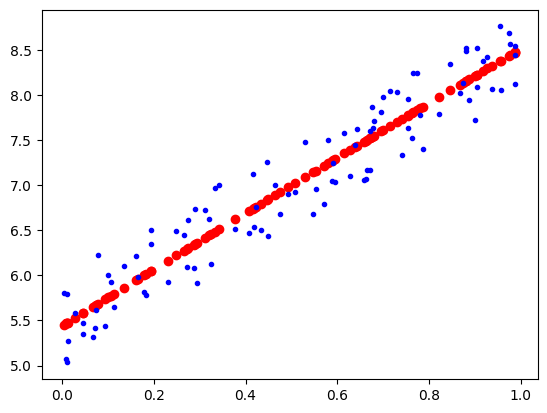

In [24]:
degree = 2  # For example, a 10th degree polynomial

# Create a complex X matrix with higher degree terms
X = np.ones((len(x), 1))
for i in range(1, degree + 1):
    X = np.c_[X, x**i]

Y = y

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# plot the original data
plt.plot(x, y, "b.")

# Plot the predicted values using X and theta
y_predict_ols = X.dot(theta_best)
plt.scatter(x, y_predict_ols, color='r')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data (assuming x and y are already defined)
degree = 1  # For example, a 10th degree polynomial

# Create a complex X matrix with higher degree terms
X = np.ones((len(x), 1))
for i in range(1, degree + 1):
    X = np.c_[X, x**i]

def ridge_regression(X, Y, alpha):
    m, n = X.shape
    I = np.identity(n)
    return np.linalg.inv(X.T.dot(X) + m * alpha * I).dot(X.T).dot(Y)

def regular_regression(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

alpha = 0.01

theta_best_ridge = ridge_regression(X, Y, alpha)
print(theta_best_ridge)
# Plot the original data
plt.plot(x, y, "b.")

theta_best = regular_regression(X, Y)
print(theta_best)

# Plot the predicted values using X and theta
y_predict_ridge = X.dot(theta_best_ridge)
plt.scatter(x, y_predict_ridge, color='r')
plt.title("Polynomial Ridge Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

NameError: name 'x' is not defined

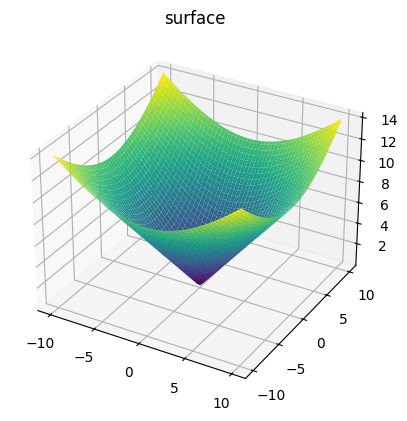

In [28]:
# plot the L2 norm across a range of theta values
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-10, 10, 100)

def L2_norm(theta0, theta1):
    return np.sqrt(theta0**2 + theta1**2)

T0, T1 = np.meshgrid(theta0, theta1)

Z = L2_norm(T0, T1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(T0, T1, Z, cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()

In [54]:
X.shape

(100, 2)

In [56]:
import numpy as np
import plotly.graph_objects as go

# Define theta ranges
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-10, 10, 100)

# Function to calculate L2 norm
def L2_norm(theta0, theta1):
    return np.sqrt(theta0**2 + theta1**2)

# Function for a sample loss (quadratic function for illustration)
def loss_function(theta0, theta1):
    # use original data x and y
    return (theta0 + theta1 * x - y)**2

# Create meshgrid
T0, T1 = np.meshgrid(theta0, theta1)

# Calculate L2 norm and loss
Z_norm = L2_norm(T0, T1)
Z_loss = loss_function(T0, T1)
Z_sum = Z_norm + Z_loss

# Plot L2 Norm
fig1 = go.Figure(data=[go.Surface(z=Z_norm, x=T0, y=T1)])
fig1.update_layout(title='L2 Norm', autosize=False, width=500, height=500,
                   margin=dict(l=65, r=50, b=65, t=90))
fig1.show()

# Plot Loss Function
fig2 = go.Figure(data=[go.Surface(z=Z_loss, x=T0, y=T1)])
# add point at non-ridge solution
fig2.update_traces(overwrite=True, selector=dict(type='scatter3d'))
fig2.add_trace(go.Scatter3d(x=[theta_best[0]], y=[theta_best[1]], z=[loss_function(theta_best[0], theta_best[1])], mode='markers', marker=dict(size=20, color='green')))
fig2.update_layout(title='Loss Function', autosize=False, width=500, height=500,
                   margin=dict(l=65, r=50, b=65, t=90))
fig2.show()

# Plot Sum of Norm and Loss
fig3 = go.Figure(data=[go.Surface(z=Z_sum, x=T0, y=T1)])
# add point at ridge solution
fig3.update_traces(overwrite=True, selector=dict(type='scatter3d'))
fig3.add_trace(go.Scatter3d(x=[theta_best_ridge[0]], y=[theta_best_ridge[1]], z=[loss_function(theta_best_ridge[0], theta_best_ridge[1])], mode='markers', marker=dict(size=20, color='green')))
fig3.update_layout(title='Sum of Norm and Loss', autosize=False, width=500, height=500,
                   margin=dict(l=65, r=50, b=65, t=90))
fig3.show()

# Create the figure
fig4 = go.Figure()

# Add L2 Norm surface
fig4.add_trace(go.Surface(z=Z_norm, x=T0, y=T1, opacity=0.7, name='L2 Norm'))

# Add Loss Function surface
fig4.add_trace(go.Surface(z=Z_loss, x=T0, y=T1, opacity=0.7, name='Loss Function'))

# Update layout for better visualization
fig4.update_layout(
    title='Overlay of L2 Norm and Loss Function',
    autosize=False,
    width=700,
    height=700,
    scene=dict(
        xaxis_title='Theta 0',
        yaxis_title='Theta 1',
        zaxis_title='Value',
    )
)

# Show the figure
fig4.show()

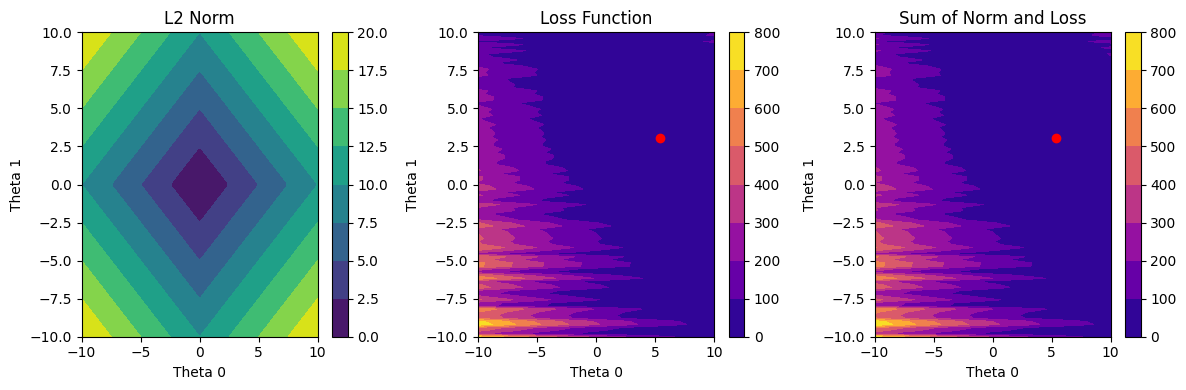

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define theta ranges
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-10, 10, 100)

# Create meshgrid
T0, T1 = np.meshgrid(theta0, theta1)

def L1_norm(theta0, theta1):
    return np.abs(theta0) + np.abs(theta1)

# Calculate L2 norm and loss
Z_norm = L1_norm(T0, T1)
Z_loss = loss_function(T0, T1)
Z_sum = Z_norm + Z_loss

# Plotting

# Plot L2 Norm
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.contourf(T0, T1, Z_norm, cmap='viridis')
plt.colorbar()
plt.title('L2 Norm')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

# Plot Loss Function
plt.subplot(1, 3, 2)
plt.contourf(T0, T1, Z_loss, cmap='plasma')
plt.colorbar()
plt.plot(theta_best[0], theta_best[1], 'ro')  # Non-ridge solution point
plt.title('Loss Function')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

# Plot Sum of Norm and Loss
plt.subplot(1, 3, 3)
plt.contourf(T0, T1, Z_sum, cmap='plasma')
plt.colorbar()
plt.plot(theta_best_ridge[0], theta_best_ridge[1], 'ro')  # Ridge solution point
plt.title('Sum of Norm and Loss')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

plt.tight_layout()
plt.show()


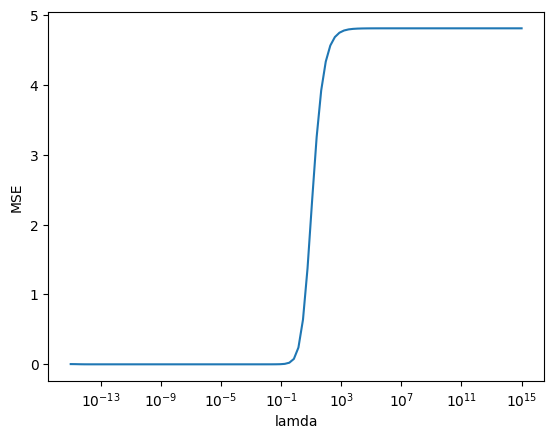

[0.003397216796874984, 0.0026354726155598802, 0.0011097749074300094, 0.0002154580752054896, 5.382100741068138e-06, 1.1456012725830526e-06, 1.3704225420954476e-06, 7.673042515916319e-07, 1.0817699755223114e-07, 2.8099554280378216e-08, 6.035164308891762e-10, 1.1123726532496518e-10, 3.5742232284379694e-10, 5.0889260213884515e-11, 1.4567073472521133e-11, 3.641768367473833e-13, 3.328869031906928e-12, 1.228054690630996e-14, 6.93556322629685e-14, 2.78075711138639e-14, 1.0445764608076197e-14, 8.848130495889161e-16, 2.228339071506254e-16, 4.035617334973082e-17, 9.001515919633178e-17, 3.748726555842759e-16, 1.4931878490023323e-15, 6.4472744887889655e-15, 2.5617178252371695e-14, 1.029878416763957e-13, 4.15599540479289e-13, 1.6779881281218739e-12, 6.7738575531549825e-12, 2.7346116761262016e-11, 1.1039430854854817e-10, 4.456453020030341e-10, 1.7989263853143057e-09, 7.261068839558683e-09, 2.930310788277048e-08, 1.1821658291713558e-07, 4.76591399010261e-07, 1.9187683766178023e-06, 7.70425968259784e-0

In [33]:
import numpy as np

X = np.array([[1, 2, 3], [1, 0, 0], [0, 1, 0], [0, 0, 1]]).T
Y = np.array([1.1, 1.9, 3.1])

# Get a logistic range for lamda for ridge regression
lamda = np.logspace(-15, 15, 100)

def ridge_regression(X, Y, alpha):
    m, n = X.shape
    I = np.identity(n)
    return np.linalg.inv(X.T.dot(X) + m * alpha * I).dot(X.T).dot(Y)

# Calculate the ridge regression solution for each value of lamda
ridge_solutions = []
for l in lamda:
    ridge_solutions.append(ridge_regression(X, Y, l))
    
# calculate the MSE for each value of lamda
def MSE(X, Y, theta):
    return np.sum((X.dot(theta) - Y)**2) / len(Y)

mse = []
for theta in ridge_solutions:
    mse.append(MSE(X, Y, theta))
    
# Plot the MSE as a function of lamda
plt.plot(lamda, mse)
plt.xlabel('lamda')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

print(mse)

In [47]:
original_array = X.T.dot(X)
lambda_test = 100000000000000
identity_array = 3* np.identity(4)*(lambda_test)
combined_array = original_array + identity_array
# only display 2 decimal places
np.set_printoptions(precision=2)
print(np.linalg.inv(combined_array))
print(np.linalg.inv(identity_array))

resulting_array_1= np.linalg.inv(combined_array).dot(X.T)

print(resulting_array_1)

resulting_array = resulting_array_1.dot(Y)
print(resulting_array)

mse = MSE(X, Y, resulting_array)

print(mse)

zero_array = np.zeros((4, 1))

mse = MSE(X, Y, zero_array)

print(mse)

[[ 3.33e-15 -1.11e-29 -2.22e-29 -3.33e-29]
 [-1.11e-29  3.33e-15  7.41e-44  1.11e-43]
 [-2.22e-29  7.41e-44  3.33e-15  2.22e-43]
 [-3.33e-29  1.11e-43  2.22e-43  3.33e-15]]
[[3.33e-15 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 3.33e-15 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 3.33e-15 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 3.33e-15]]
[[ 3.33e-15  6.67e-15  1.00e-14]
 [ 3.33e-15 -2.22e-29 -3.33e-29]
 [-2.22e-29  3.33e-15 -6.67e-29]
 [-3.33e-29 -6.67e-29  3.33e-15]]
[4.73e-14 3.67e-15 6.33e-15 1.03e-14]
4.80999999999952
14.43


In [43]:
Y.dot(Y.T)/3

4.8100000000000005

In [49]:
original_array = X.T.dot(X)
lambda_test = 1
identity_array = 3* np.identity(4)*(lambda_test)
combined_array = original_array + identity_array
# only display 2 decimal places
np.set_printoptions(precision=3)
resulting_array_1= np.linalg.inv(combined_array).dot(X.T)
resulting_array = resulting_array_1.dot(Y)
print(resulting_array)

[0.789 0.078 0.081 0.183]
